In [1]:
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
import glob
import os
import re

Using TensorFlow backend.


In [2]:
def draw_faces(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot each face as a subplot
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        # plot face
        pyplot.imshow(data[y1:y2, x1:x2])
        img_name = "pictures/User_" + str(i+1) + ".jpg"
        pil_img = Image.fromarray(data[y1:y2, x1:x2])
        pil_img.save(img_name)
    # show the plot
    pyplot.show()

In [3]:
# extract a single face from a given photograph
def extract_face(filename, is_extracted, required_size=(224, 224)):
    # load image from file
    pixels = pyplot.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    if(not is_extracted):
        results = detector.detect_faces(pixels)
        # extract the bounding box from the first face
        x1, y1, width, height = results[0]['box']
        x2, y2 = x1 + width, y1 + height
        # extract the face
        face = pixels[y1:y2, x1:x2]
        # resize pixels to the model size
        image = Image.fromarray(face)
    else:
        image = Image.fromarray(pixels)
    
    image = image.resize(required_size)
    face_array = asarray(image)
    
    return face_array

In [11]:
# extract faces and calculate face embeddings for a list of photo files
def get_embeddings(filenames, is_extracted=False):
    # extract faces
    faces = [extract_face(f, is_extracted) for f in filenames]
    # convert into an array of samples
    samples = asarray(faces, 'float32')
    # prepare the face for the model, e.g. center pixels
    samples = preprocess_input(samples, version=2)
    # perform prediction
    yhat = model.predict(samples)
    return yhat

In [5]:
# determine if a candidate face is a match for a known face
def is_match(known_embedding, candidate_embedding, i, thresh=0.5):
    # calculate distance between embeddings
    score = cosine(known_embedding, candidate_embedding)
    if score <= thresh:
        dir_name = filenames[i]
        dir_name = re.search(r'\\(\D+)\\', dir_name)
        print("Face de {} encontrada".format(dir_name.group(1)))
        print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
    #else:
     #   print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))






Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.



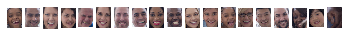

In [6]:
filename = 'pictures/images.jpg'
pixels = pyplot.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)
draw_faces(filename, faces)

In [10]:
model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

In [12]:
# define filenames
filenames = [img for img in glob.glob('pictures/*/*.jpg', recursive=True)]
# get embeddings file filenames
embeddings_filenames = get_embeddings(filenames, False)


In [13]:
target_file = glob.glob("pictures/1.jpg")
embeddings_target = get_embeddings(target_file, False)


for i, embedding in enumerate(embeddings_filenames):
    for target in embeddings_target:
        is_match(target, embedding, i)

Face de Dinho encontrada
>face is a Match (0.477 <= 0.500)
Face de Dinho encontrada
>face is a Match (0.458 <= 0.500)
Face de Dinho encontrada
>face is a Match (0.440 <= 0.500)
